In [160]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [161]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")

In [162]:
#1.1 t-test to identify statistical significance of differences between cohorts A and B in the maximum levels reached by users on the last day.
# Фильтруем данные, оставляя только записи за последний день жизни (Retention = 7)
data_last_day_A = data[(data['AB_Cohort'] == 'A') & (data['Retention'] == 7)]
data_last_day_B = data[(data['AB_Cohort'] == 'B') & (data['Retention'] == 7)]

# Выбираем столбец MaxLevelPassed для каждой когорты на последний день
max_level_last_day_A = data_last_day_A['MaxLevelPassed']
max_level_last_day_B = data_last_day_B['MaxLevelPassed']

# Проводим t-тест для сравнения MaxLevelPassed между когортами A и B на последний день
t_statistic, p_value = ttest_ind(max_level_last_day_A, max_level_last_day_B, equal_var=False)

# Выводим результаты
print("T-test results for MaxLevelPassed on the last day:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Определяем уровень значимости
alpha = 0.05

# Проверяем статистическую значимость
if p_value < alpha:
    print("The difference in MaxLevelPassed between cohorts A and B is statistically significant.")
else:
    print("There is no statistically significant difference in MaxLevelPassed between cohorts A and B.")


T-test results for MaxLevelPassed on the last day:
T-statistic: -7.263489292894719
p-value: 5.73762768217606e-13
The difference in MaxLevelPassed between cohorts A and B is statistically significant.


In [163]:
data_cohort_A = pd.read_csv("./data_proc/data_cohort_A.csv",delimiter=",")
data_cohort_B = pd.read_csv("./data_proc/data_cohort_B.csv",delimiter=",")
print("Размерность таблицы data_cohort_A:", data_cohort_A.shape)
print("Размерность таблицы data_cohort_B:", data_cohort_B.shape)


Размерность таблицы data_cohort_A: (12684, 22)
Размерность таблицы data_cohort_B: (12698, 22)


C:\Users\User\AppData\Local\Temp\ipykernel_44060\1706794691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_cohort_A = data_cohort_A.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_44060\1706794691.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_cohort_B = data_cohort_B.corr()


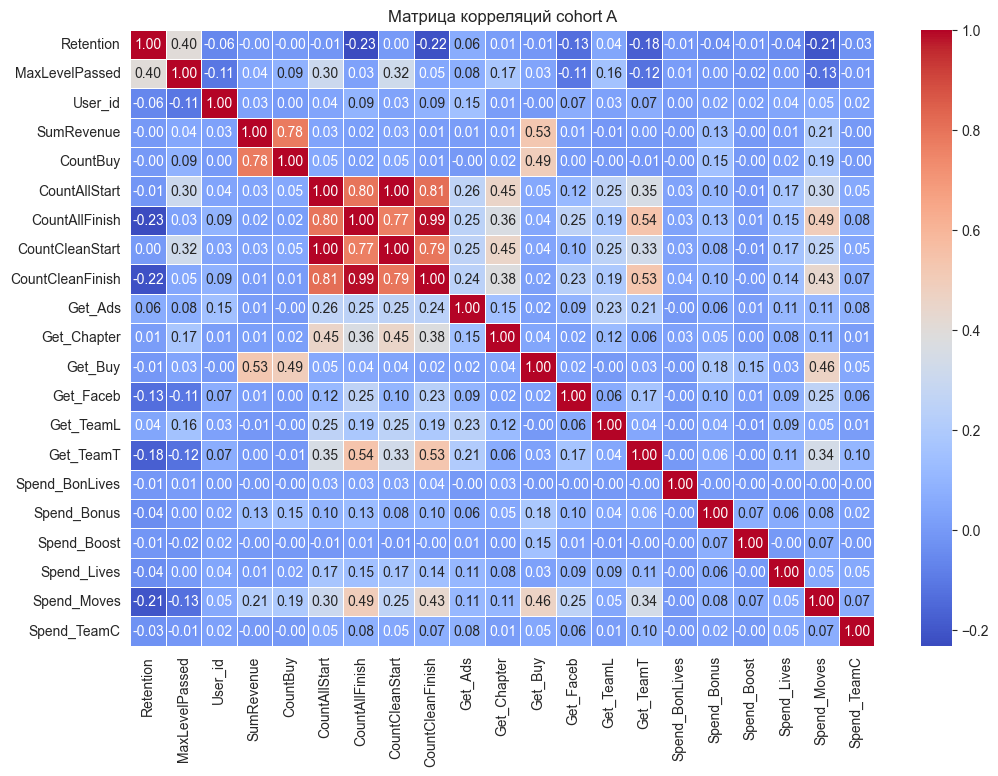

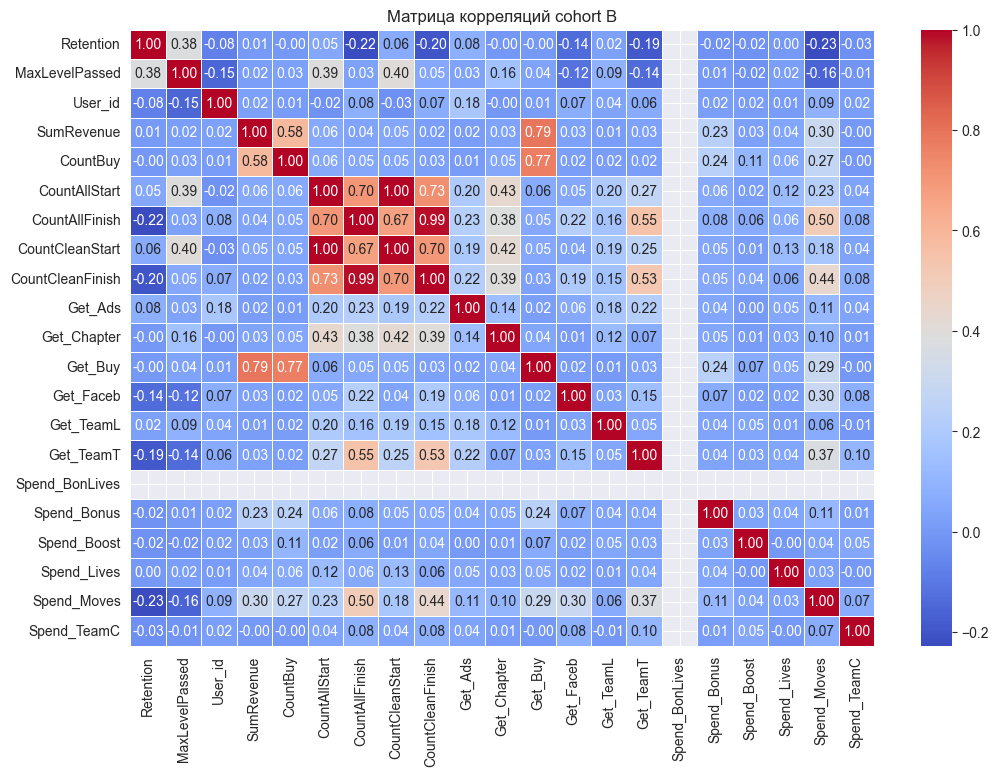

In [164]:
# Вычислите матрицу корреляций для обеих когорт
correlation_matrix_cohort_A = data_cohort_A.corr()
correlation_matrix_cohort_B = data_cohort_B.corr()

# Создайте подзаголовки для тепловых карт
titles = ['Матрица корреляций cohort A', 'Матрица корреляций cohort B']

# Создайте тепловые карты для визуализации корреляций в одном цикле
for i, correlation_matrix in enumerate([correlation_matrix_cohort_A, correlation_matrix_cohort_B]):
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(titles[i])
    plt.show()


In [165]:
def aggregate_cohort_data(data):
    aggregated_data = data.groupby('User_id').agg({
        'Retention': 'max',
        'MaxLevelPassed': 'max',
        'AB_Cohort': 'first',
        'SumRevenue': 'sum',
        'CountBuy': 'sum',
        'CountAllStart': 'sum',
        'CountAllFinish': 'sum',
        'CountCleanStart': 'sum',
        'CountCleanFinish': 'sum',
        'Get_Ads': 'sum',
        'Get_Chapter': 'sum',
        'Get_Buy': 'sum',
        'Get_Faceb': 'sum',
        'Get_TeamL': 'sum',
        'Get_TeamT': 'sum',
        'Spend_BonLives': 'sum',
        'Spend_Bonus': 'sum',
        'Spend_Boost': 'sum',
        'Spend_Lives': 'sum',
        'Spend_Moves': 'sum',
        'Spend_TeamC': 'sum'
    }).reset_index()

    return aggregated_data

# Применяем функцию к data_cohort_A
aggregated_data_cohort_A = aggregate_cohort_data(data_cohort_A)

# Применяем функцию к data_cohort_B
aggregated_data_cohort_B = aggregate_cohort_data(data_cohort_B)

# Сохраните data_scaled_cohort_A в CSV
aggregated_data_cohort_A.to_csv('./data_proc/aggregated_data_cohort_A.csv', index=False)

# Сохраните data_scaled_cohort_B в CSV
aggregated_data_cohort_B.to_csv('./data_proc/aggregated_data_cohort_B.csv', index=False)


In [166]:

# scaling with choice of method
def scale_dataframe(df, ignore_columns=[]):
    columns_to_scale = [col for col in df.columns if col not in ignore_columns]
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(df[columns_to_scale])
    # Обновляем значения в столбцах, которые нужно масштабировать
    df.loc[:, columns_to_scale] = scaled_data
    return df
data_scaled_cohort_A = scale_dataframe(aggregated_data_cohort_A,ignore_columns = ["User_id","AB_Cohort","Retention"])
data_scaled_cohort_B = scale_dataframe(aggregated_data_cohort_B,ignore_columns = ["User_id","AB_Cohort","Retention"])

print(data_scaled_cohort_A.head())
print(data_scaled_cohort_B.head())

# Сохраните data_scaled_cohort_A в CSV
data_scaled_cohort_A.to_csv('./data_proc/data_scaled_cohort_A.csv', index=False)

# Сохраните data_scaled_cohort_B в CSV
data_scaled_cohort_B.to_csv('./data_proc/data_scaled_cohort_B.csv', index=False)


   User_id  Retention  MaxLevelPassed AB_Cohort  SumRevenue  CountBuy  \
0        1          0        0.588235         A         0.0       0.0   
1        2          0        0.588235         A         0.0       0.0   
2        3          0       -0.323529         A         0.0       0.0   
3        4          0       -0.676471         A         0.0       0.0   
4        5          0        0.264706         A         0.0       0.0   

   CountAllStart  CountAllFinish  CountCleanStart  CountCleanFinish  ...  \
0      -0.254545       -0.380952        -0.234043         -0.352941  ...   
1      -0.254545       -0.380952        -0.234043         -0.352941  ...   
2       0.072727        0.333333         0.063830          0.294118  ...   
3      -0.254545       -0.380952        -0.234043         -0.352941  ...   
4      -0.254545       -0.380952        -0.234043         -0.352941  ...   

   Get_Buy  Get_Faceb  Get_TeamL  Get_TeamT  Spend_BonLives  Spend_Bonus  \
0      0.0        0.0       

C:\Users\User\AppData\Local\Temp\ipykernel_44060\142363500.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, columns_to_scale] = scaled_data
C:\Users\User\AppData\Local\Temp\ipykernel_44060\142363500.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, columns_to_scale] = scaled_data


In [169]:

def linear_regression(data, ignore_columns=[]):
    # Определите независимые переменные (факторы) и зависимую переменную
    X = data.drop(ignore_columns, axis=1)
    y = data['SumRevenue']

    # Разделите данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создайте модель линейной регрессии
    model = LinearRegression()

    # Обучите модель на тренировочных данных
    model.fit(X_train, y_train)

    # Сделайте предсказания на тестовых данных
    y_pred = model.predict(X_test)

    # Вычислите среднюю квадратичную ошибку (MSE) и коэффициент детерминации (R^2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Выведите результаты
    print("Средняя квадратичная ошибка (MSE):", mse)
    print("Коэффициент детерминации (R^2):", r2)

    # Получите коэффициенты линейной модели
    coefficients = model.coef_

    # Получите имена признаков
    feature_names = data.columns.drop(ignore_columns)

    # Создайте DataFrame, чтобы отобразить коэффициенты для каждого признака
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Отсортируйте по модулю коэффициента
    # Сортировка по убыванию модуля коэффициента
    coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)


    # Выведите коэффициенты
    print(coefficients_df)

# Примените функцию к вашим данным, игнорируя указанные столбцы
linear_regression(data_scaled_cohort_A, ignore_columns=['SumRevenue', 'User_id', 'AB_Cohort'])
linear_regression(aggregated_data_cohort_A, ignore_columns=['SumRevenue', 'User_id', 'AB_Cohort'])
linear_regression(data_scaled_cohort_A,ignore_columns=['SumRevenue', 'User_id', 'AB_Cohort'])


Средняя квадратичная ошибка (MSE): 156.51530144126193
Коэффициент детерминации (R^2): -0.17839303848134858
             Feature  Coefficient
2           CountBuy    57.938600
3      CountAllStart   -24.098835
4     CountAllFinish    23.235848
5    CountCleanStart    21.619715
6   CountCleanFinish   -19.936534
17       Spend_Moves    -2.163586
1     MaxLevelPassed    -0.475302
18       Spend_TeamC    -0.084056
15       Spend_Boost    -0.048695
0          Retention     0.017589
11         Get_TeamL    -0.012036
12         Get_TeamT     0.011663
9            Get_Buy     0.008480
7            Get_Ads     0.005683
16       Spend_Lives    -0.002642
10         Get_Faceb     0.002372
13    Spend_BonLives    -0.000400
8        Get_Chapter     0.000385
14       Spend_Bonus    -0.000214
Средняя квадратичная ошибка (MSE): 156.51530144126193
Коэффициент детерминации (R^2): -0.17839303848134858
             Feature  Coefficient
2           CountBuy    57.938600
3      CountAllStart   -24.098835
4   

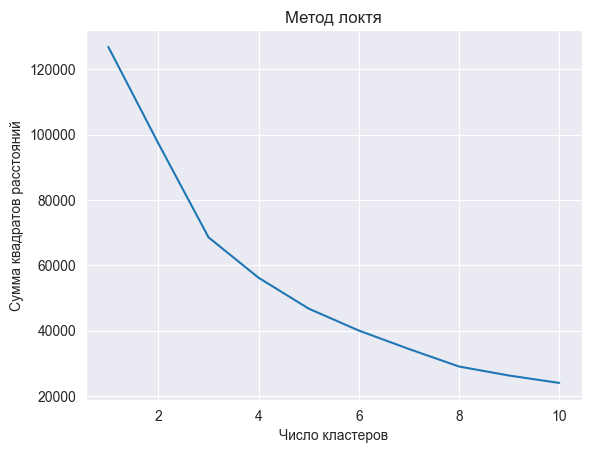

   Cluster  MaxLevelPassed  SumRevenue  CountBuy  CountAllStart  \
0        0       36.092283    0.279305  0.002031       9.533201   
1        1       57.782515    1.006707  0.005988      61.100359   
2        2       69.393939  706.818182  3.242424      50.272727   

   CountAllFinish  User_id  
0        2.882922    21174  
1       18.133174     4175  
2       11.424242       33  


In [168]:
# Загрузка данных

# Выбор признаков для кластеризации
features = data[['MaxLevelPassed', 'SumRevenue', 'CountBuy', 'CountAllStart', 'CountAllFinish']]

# Стандартизация данных (важно для KMeans)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Выбор числа кластеров (можно использовать метод локтя)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Отображение метода локтя для выбора числа кластеров
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

# Выбор оптимального числа кластеров (например, по графику метода локтя)
optimal_clusters = 3  # Выбираем оптимальное число кластеров

# Кластеризация данных
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Добавление столбца с кластерами в исходные данные
data['Cluster'] = clusters

# Вывод статистики по кластерам
cluster_stats = data.groupby('Cluster').agg({
    'MaxLevelPassed': 'mean',
    'SumRevenue': 'mean',
    'CountBuy': 'mean',
    'CountAllStart': 'mean',
    'CountAllFinish': 'mean',
    'User_id': 'count'
}).reset_index()

print(cluster_stats)